<a href="https://colab.research.google.com/github/anuragphalke09/anuragphalke09/blob/main/BA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Average Cross-Validation Accuracy: 49.01%


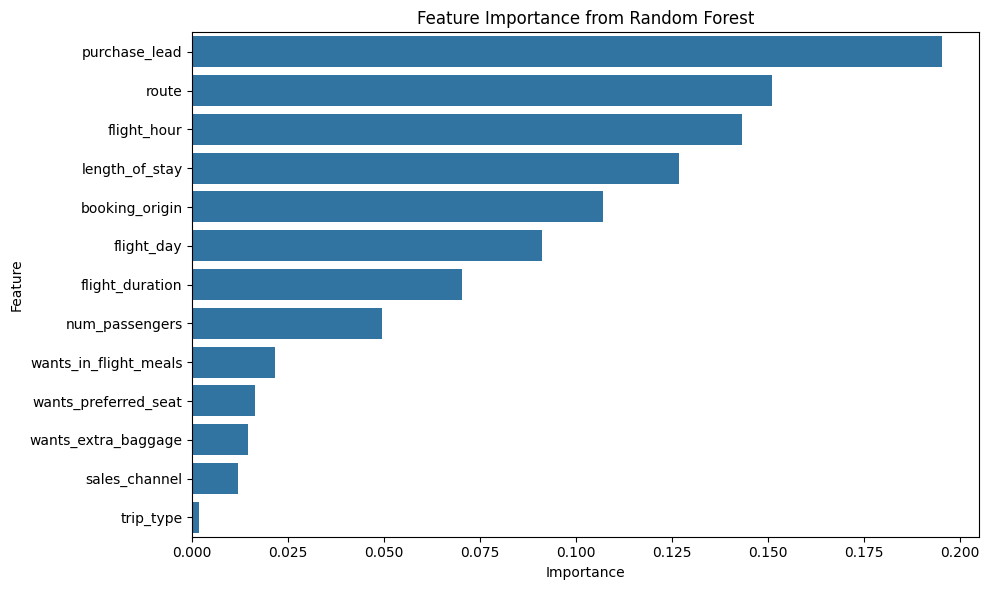


Top Contributing Features:
                  Feature  Importance
3           purchase_lead    0.195296
7                   route    0.151066
5             flight_hour    0.143083
4          length_of_stay    0.126814
8          booking_origin    0.106940
6              flight_day    0.091123
12        flight_duration    0.070344
0          num_passengers    0.049338
11  wants_in_flight_meals    0.021574
10   wants_preferred_seat    0.016410


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load your cleaned data, specifying the encoding
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")  # Use the correct encoding

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.2%}")

# Feature importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig("feature_importance.png")  # Save image for PowerPoint
plt.show()

# Print top features
print("\nTop Contributing Features:")
print(importance_df.head(10))

In [11]:
pip install python-pptx matplotlib seaborn pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 8.5 MB/s eta 0:00:00


✅ PowerPoint saved to your Documents/data folder!


In [15]:
from pptx import Presentation

# Create a simple presentation for testing
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Test Slide"
slide.placeholders[1].text = "PowerPoint created in Colab!"

# Save to Colab environment
pptx_filename = "Booking_Model_Evaluation.pptx"
prs.save(pptx_filename)

# Download to your computer
from google.colab import files
files.download(pptx_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# --- Create PowerPoint Slide ---
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Title only
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Model Evaluation"

# Add text summary
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1.5), Inches(4.5), Inches(3))
frame = textbox.text_frame
frame.word_wrap = True

p = frame.add_paragraph()
p.text = "• Model: Random Forest Classifier"
p.font.size = Pt(18)

p = frame.add_paragraph()
p.text = f"• Accuracy (5-Fold CV): {cv_score:.2%}"
p.font.size = Pt(18)

p = frame.add_paragraph()
p.text = "• Top Features:"
p.font.size = Pt(18)

for feature in importances['Feature'].head(3):
    p = frame.add_paragraph()
    p.text = f"   – {feature}"
    p.font.size = Pt(18)

# Add the image
slide.shapes.add_picture("feature_importance.png", Inches(5.3), Inches(1.5), width=Inches(4))

# Save and Download
pptx_filename = "Booking_Model_Evaluation.pptx"
prs.save(pptx_filename)
files.download(pptx_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>